In [123]:
# Compare plots for:
#   1) 'cum_critical'
#   2) 'n_critical'
#   3) 'cum_severe'
#   4) 'n_severe'
#   5) 'cum_infections'
#   6) 'new infections per day'
#   7) 'cum_deaths'

# Conclusion: 
# 1) dynamic_scaling and no_scaling have almost similar plot
# 2) static_scaling and no_scaling have significant difference in their plot  

In [16]:
import covasim as cv
import numpy as np

cv.options.set(dpi=100, show=False, close=True, verbose=0) # Standard options for Jupyter notebook

In [17]:
def plot_default(msim):
    msim.plot()

def plot_specific(msim):
    msim.plot(to_plot=['cum_critical', 'n_critical', 'cum_severe', 'n_severe'])

In [39]:
n_days = 50   # simulation will run for n_days days

actual_pop = 100_000
scale = 5   # if scaled scale factor
init_infected = 1000  # infected population


# no need to change below
pars = dict(
    n_days = n_days,
    
    pop_type = 'hybrid', # Use a more realistic population model
    location = 'India-TamilNadu', # Use population characteristics for Tamil-Nadu
    
    pop_infected = init_infected, 

    quar_factor = {'h': 0.6, 's': 0, 'w': 0.2, 'c': 0}, # change this factor after certain day
    quar_period = 7,
)

pars_dynamic_rescale = dict( 
    pop_size = actual_pop//scale, # Have 10 thousands people total in the population
    pop_scale = scale,
    rescale = True,
)
pars_dynamic_rescale.update(pars)

pars_no_rescale = dict(
    pop_size = actual_pop
)
pars_no_rescale.update(pars)

pars_static_rescale = dict(
    pop_size = actual_pop//scale,
    pop_scale = scale,
    rescale = False
)
pars_static_rescale.update(pars)

def get_multi_sim(interventions=[], reset_seed=False, waning=False):
    if reset_seed:
        pars['rand_seed'] = np.random.randint(100)
    sim_no_rescale = cv.Sim(pars_no_rescale, use_waning=waning, interventions=interventions, label='no_rescale')
    sim_dynamic = cv.Sim(pars_dynamic_rescale, use_waning=waning, interventions=interventions, label='dynamic')
    sim_static = cv.Sim(pars_static_rescale, use_waning=waning, interventions=interventions, label='static')
    msim = cv.MultiSim([sim_no_rescale, sim_dynamic, sim_static])
    return msim

In [40]:
# without intervention(s)

msim = get_multi_sim(reset_seed=True)
msim.run()

MultiSim("no_rescale"; n_sims: 3; base: Sim("no_rescale"; 2020-03-01 to 2020-04-20; pop: 100000 hybrid; epi: not run))

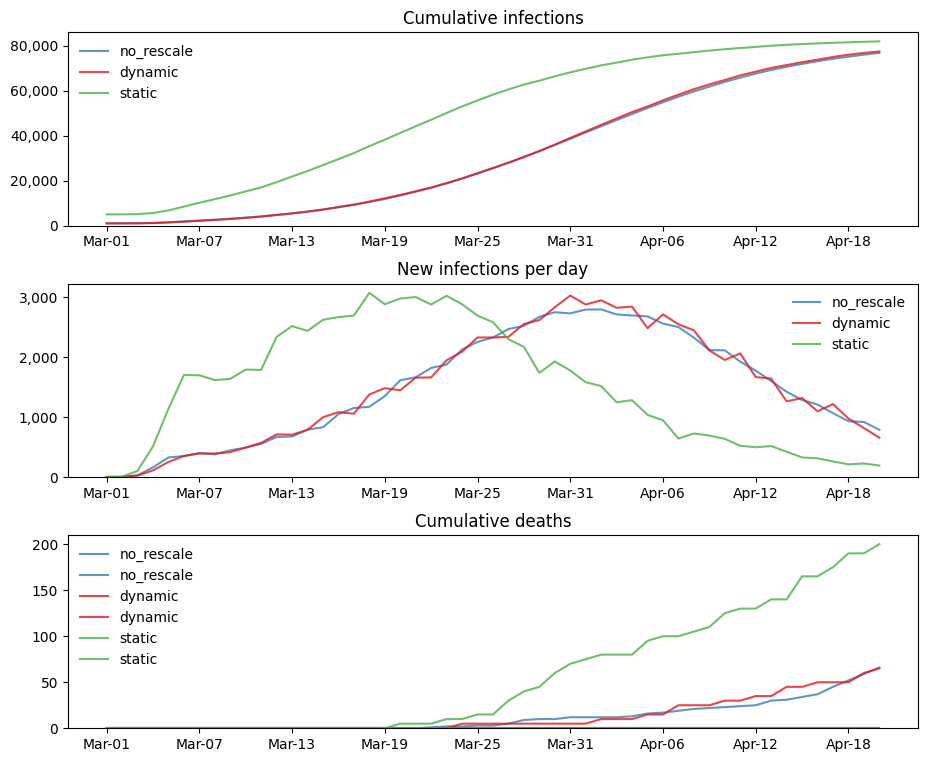

In [41]:
# plot_default(msim)
msim.plot()

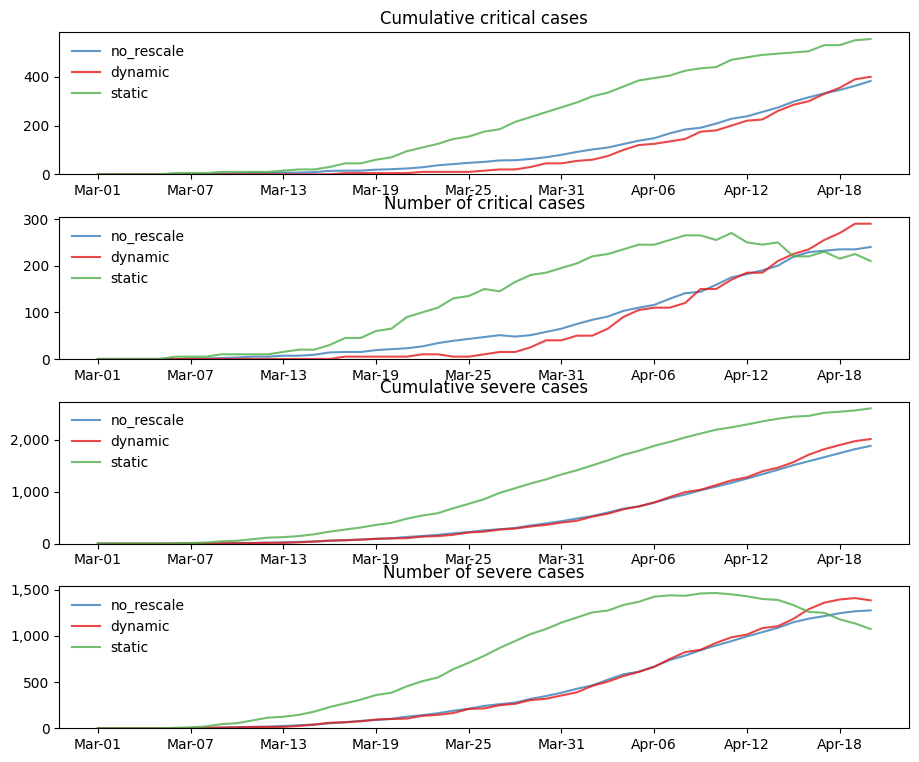

In [43]:
# plot_specific(msim)
msim.plot(to_plot=['cum_critical', 'n_critical', 'cum_severe', 'n_severe'])

In [44]:
# with intervension
## test intervension

is_start_policy = False

def sub_target(sim):
    return {'inds': cv.true(sim.people.age>50), 'vals':2}

test_num = cv.test_num(
    daily_tests=0.20*actual_pop,
    
    symp_test=2,
    quar_test=3,
    quar_policy='start' if is_start_policy else 'end',
    
    ili_prev=0.2,

    sensitivity=0.8,

    test_delay=2,
    
    subtarget=sub_target
)

msim = get_multi_sim(interventions=[test_num])
msim.run()

MultiSim("no_rescale"; n_sims: 3; base: Sim("no_rescale"; 2020-03-01 to 2020-04-20; pop: 100000 hybrid; epi: not run))

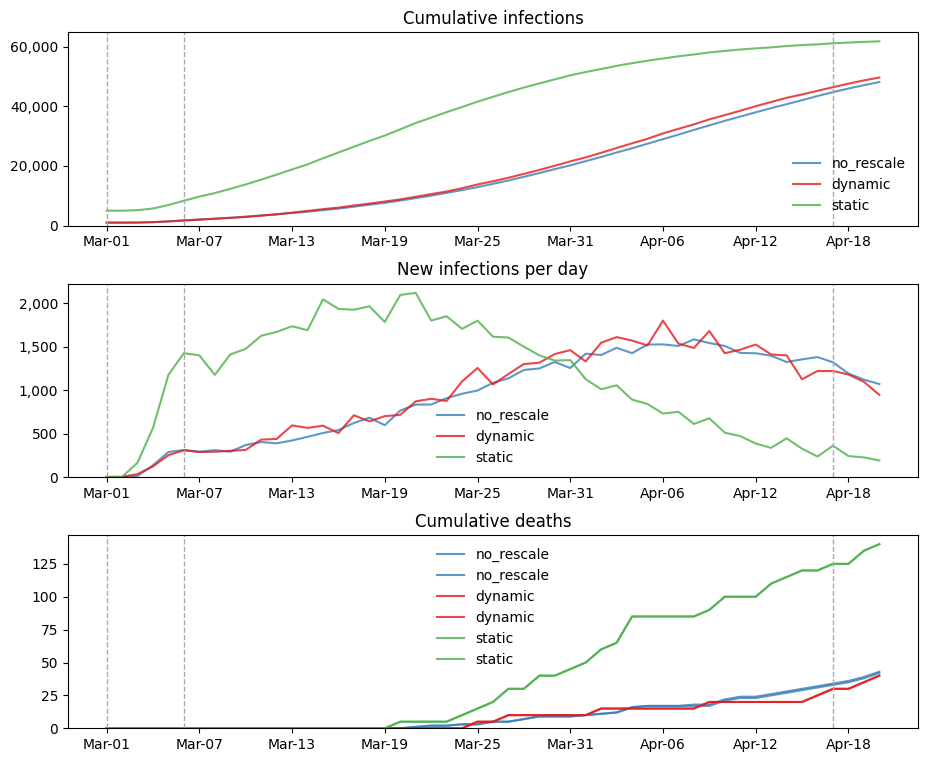

In [52]:
# plot_default(msim)
msim.plot()

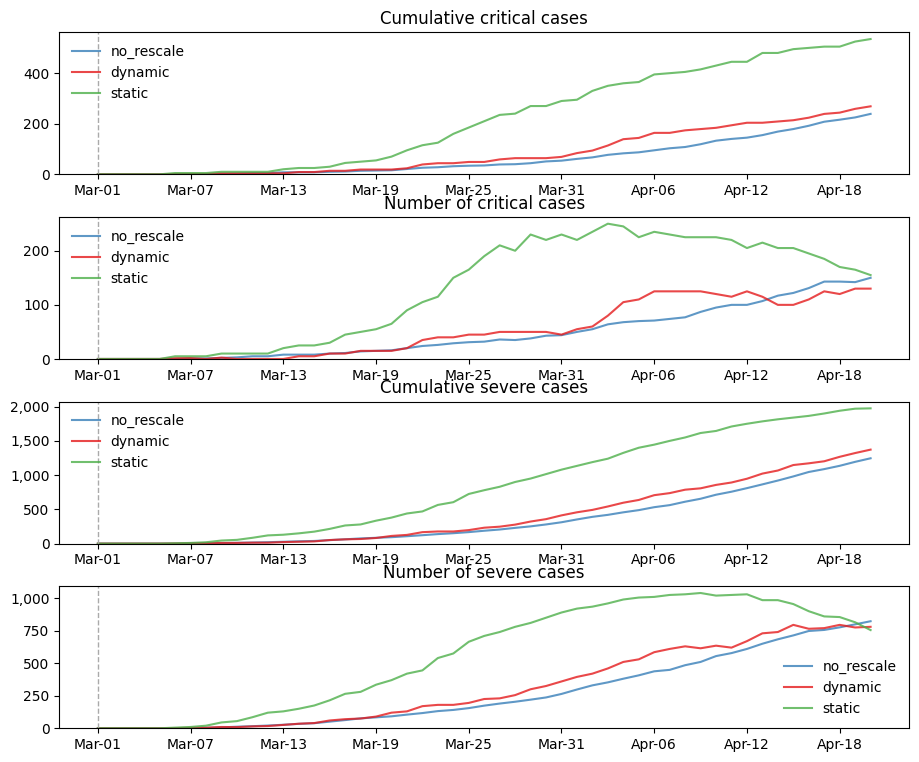

In [47]:
# plot_specific(msim)
msim.plot(to_plot=['cum_critical', 'n_critical', 'cum_severe', 'n_severe'])

In [48]:
## clip_edges
### on 5th day remove 30% school contacts and restore them on 47th day
clip_intervention = cv.clip_edges(days=[5, 47], changes=[0.7, 1], layers='s')

msim = get_multi_sim(interventions=[test_num, clip_intervention])
msim.run()

MultiSim("no_rescale"; n_sims: 3; base: Sim("no_rescale"; 2020-03-01 to 2020-04-20; pop: 100000 hybrid; epi: not run))

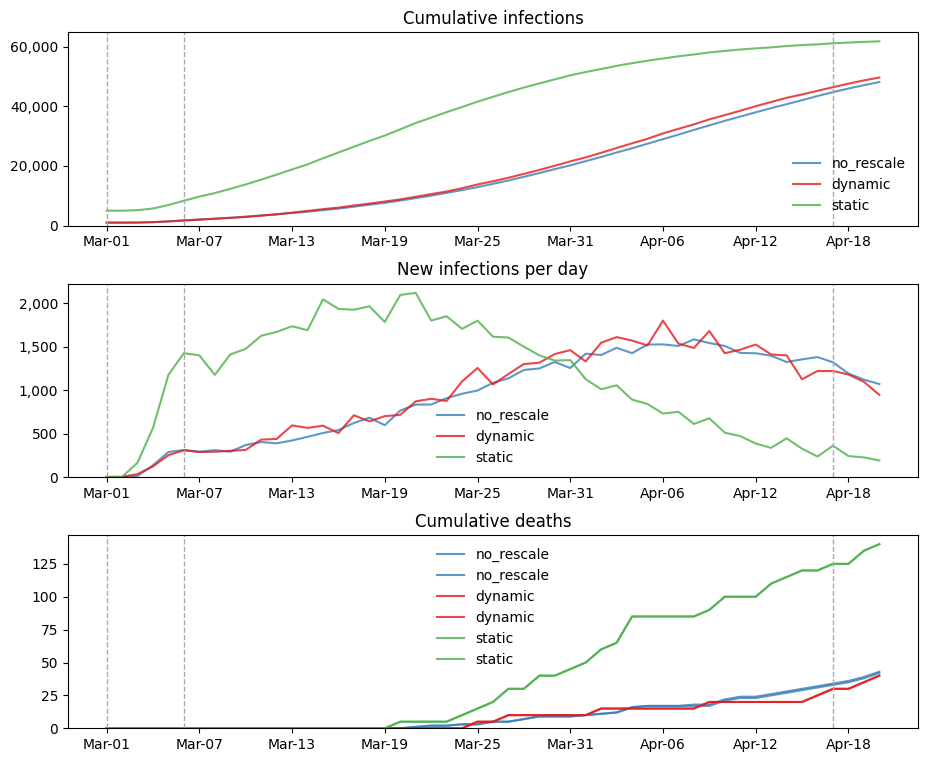

In [49]:
# plot_default(msim)
msim.plot()

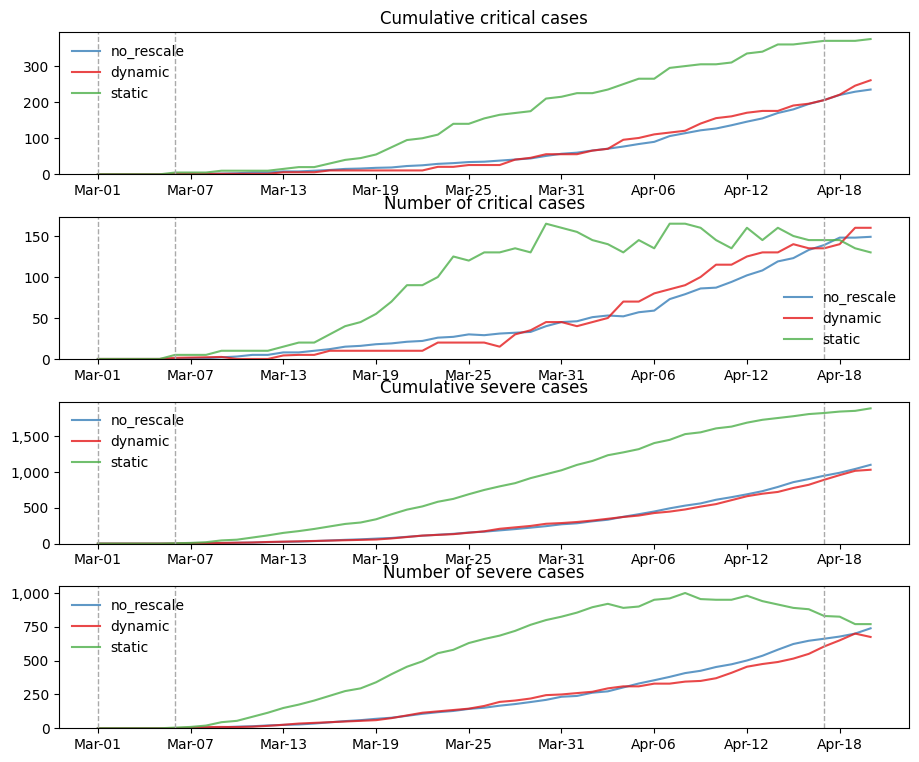

In [50]:
# plot_specific(msim)
msim.plot(to_plot=['cum_critical', 'n_critical', 'cum_severe', 'n_severe'])

In [36]:
## vaccination
def age_sequence(people):
    return np.argsort(-people.age)

def doses(sim):
    return 0 if sim.t<20 else 0.02*actual_pop

vaccine_intervention = cv.vaccinate_num(
    vaccine='az',
    sequence=age_sequence,
    num_doses=doses
)

msim = get_multi_sim(interventions=[test_num, clip_intervention, vaccine_intervention], waning=True)
msim.run()

MultiSim("no_rescale"; n_sims: 3; base: Sim("no_rescale"; 2020-03-01 to 2020-04-20; pop: 100000 hybrid; epi: not run))

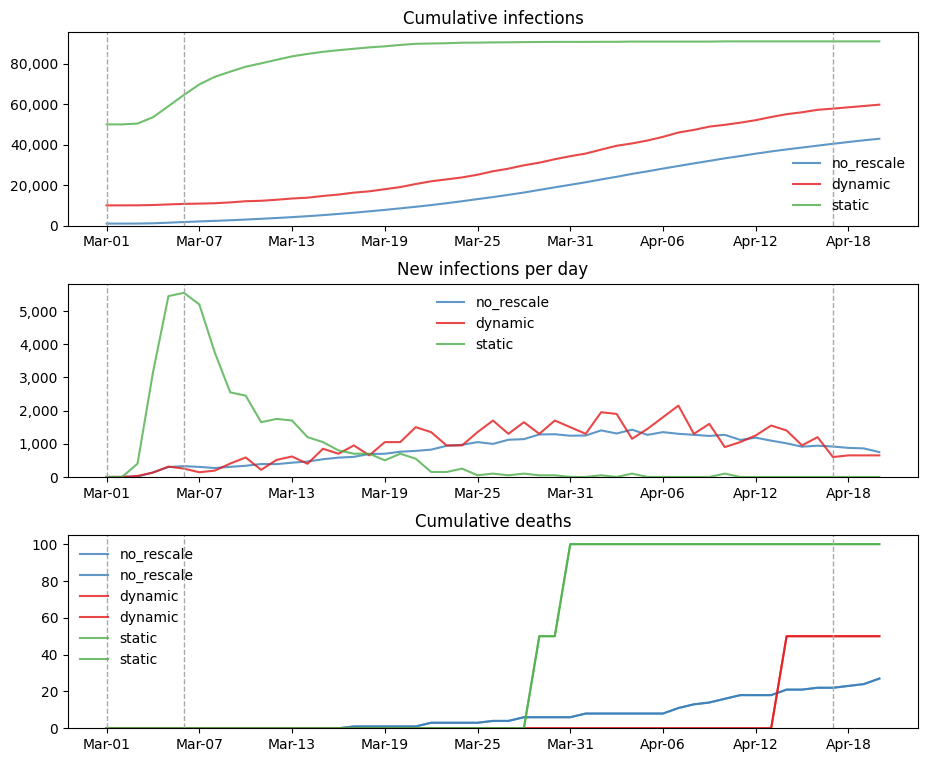

In [37]:
# plot_default(msim)
msim.plot()

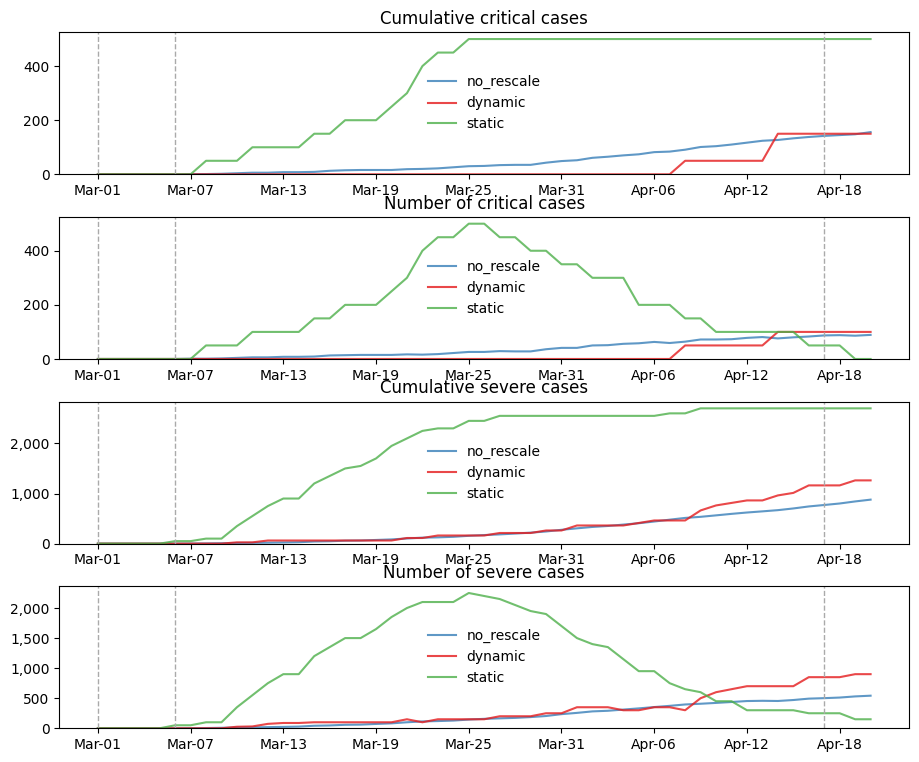

In [38]:
# plot_specific(msim)
msim.plot(to_plot=['cum_critical', 'n_critical', 'cum_severe', 'n_severe'])